## Objectives

```
- Forward Propagation
- Activation Functions
- Loss Functions
- Cost Functions
- Deep Neural Network
- Backward Propagation
```

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure the backend
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

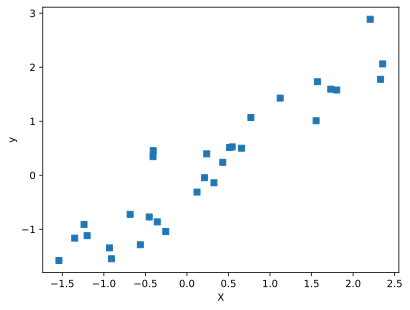

In [3]:
# Create data
N = 30
X = torch.randn(N, 1)
y = X + torch.randn(N, 1) / 2

# Visualize
plt.scatter(X, y, marker="s")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Build ANN Model

<br>

[![image.png](https://i.postimg.cc/NFkqbKP5/image.png)](https://postimg.cc/64qmppKX)

In [4]:
# Build model
ann_reg = nn.Sequential(
    nn.Linear(1, 1),  # input layer: 1 input and 1 output
    nn.ReLU(),  # Non-linear (activation) function
    nn.Linear(1, 1),  # output layer
)

ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
ann_reg.parameters()

<generator object Module.parameters at 0x7fba9573dee0>

In [6]:
# Set up optimizer
learning_rate = 0.05
loss_function = nn.MSELoss()

# Optimizer: A variant of gradient descent to be implemented
optimizer = torch.optim.SGD(params=ann_reg.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [7]:
# Train model
num_epochs = 500
# Instantiate losses
losses = torch.zeros(size=(num_epochs,))

In [8]:
for epoch_idx in range(num_epochs):
    # Forward prop
    y_pred = ann_reg(X)

    # Compute loss
    loss = loss_function(y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    optimizer.zero_grad()  # set the gradients to 0
    loss.backward()
    optimizer.step()

In [9]:
# Make predictions
predictions = ann_reg(X)

# Cost Function (Final loss using the entire data)
test_loss = (predictions - y).pow(2).mean()
test_loss

tensor(0.1708, grad_fn=<MeanBackward0>)

In [10]:
losses[:8]

tensor([2.7249, 2.4643, 2.2515, 2.0769, 1.9328, 1.8129, 1.7125, 1.6278],
       grad_fn=<SliceBackward0>)

In [11]:
# Extract only the tensor. (similar to converting it to numpy array)
losses.detach()[:3]

tensor([2.7249, 2.4643, 2.2515])

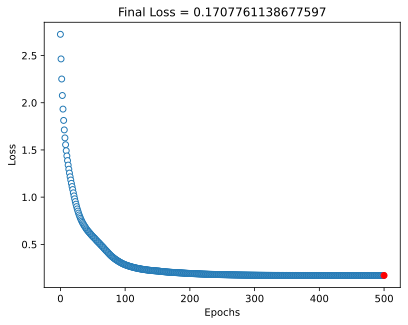

In [12]:
# Visualize
plt.plot(losses.detach(), "o", mfc="w", lw=0.1)
plt.plot(num_epochs, test_loss.detach(), "ro")
plt.title(f"Final Loss = {test_loss.item()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Observation(s)

```
- The model trained for too long since the loss had plateaued and stopped decreasing.
- Training for about 200 to 300 might have been better.
```

In [13]:
y.shape, predictions.shape

# We want tot get a result with the shape of (1, 1).
# It means we have to transpose y so that (1, 30) x (30, 1) = (1, 1)

(torch.Size([30, 1]), torch.Size([30, 1]))

In [14]:
corr_value = np.corrcoef(y.T, predictions.detach().T)[0, 1]
corr_value

0.9389036514689583

### Observations

```
- The correlation between y and the predictions is not always a valid number. i.e it can be NaN.
- This happens when the model fails to make good predictions. i.e fails to learn the relationship between the input and the target variable.
- Most of the time, the performance of the model is poor.
```

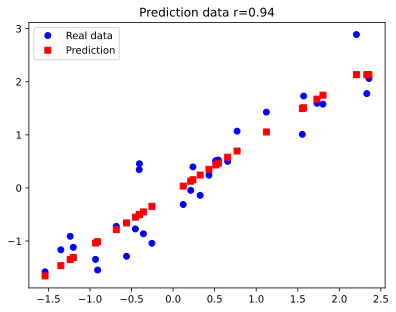

In [15]:
# Visualize the data
plt.plot(X, y, "bo", label="Real data")
plt.plot(X, predictions.detach(), "rs", label="Prediction")

# Display the correlation between the predicted values and the actual value.
plt.title(f"Prediction data r={corr_value:.2f}")

plt.legend()
plt.show()

## Workflow For Building and Training A Neural Network (PyTorch)

1. Build model.
2. Setup optimizer.
   1. Loss function.
   2. Learning rate.
3. Initialize parameters
   1. Losses
   2. Epochs
4. Train model.
   1. Forward prop.
   2. Compute losses per epoch.
   3. Back prop.
5. Make predictions.
6. Calculate cost function.
7.  Visualize the losses during training. (Optional)

<br>

```python
# Build model
model = nn.Sequential(
    # Input layer
    nn.Linear(1, 1),
    # Activation function
    nn.ReLU(),
    # Output layer (Linear function)
    nn.Linear(1, 1),
)

# Optimizer
learning_rate, loss_function = 0.01, nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Init params
epochs = 300
losses = torch.zeros(size=(epochs,))

# Train model
for epoch_idx in range(epochs):
    # Fwd prop
    _y_pred = model(X)

    # Compute loss
    loss = loss_function(_y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Make Predictions
y_pred = model(X)

# Evaluation: MSE = mean((y_pred - y_true)^2)
validation_loss = (
    (y_pred.detach() - y).pow(2).mean()
)  # OR torch.mean(torch.square(y_pred.detach() - y))

```

### Multi-layer Network

```
- Deep neural network with many hidden layers and nodes.
```

In [16]:
# create data
n_clust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(n_clust) * blur, A[1] + np.random.randn(n_clust) * blur]
b = [B[0] + np.random.randn(n_clust) * blur, B[1] + np.random.randn(n_clust) * blur]

a[0].shape

(100,)

In [17]:
# True labels (NumPy)
# Stack zeros and ones vertically
labels_np = np.vstack((np.zeros((n_clust, 1)), np.ones((n_clust, 1))))
labels_np.shape

(200, 1)

In [18]:
# Concatenate into a matrix
data_np = np.hstack((a, b)).T
data_np.shape

(200, 2)

In [19]:
# Convert data to PyTorch Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [20]:
# It returns the indices and the actual values
np.where(labels == 0)


# Select the indices that match the filter
# np.where(labels == 0)[0]

# Select the corresponding values
# np.where(labels == 0)[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

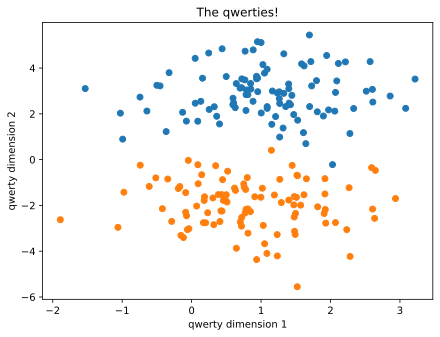

In [21]:
# Visualize data
plt.figure(figsize=(7, 5))

plt.scatter(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1])
plt.scatter(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1])

plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")

plt.show()

In [22]:
def _classify(value: float) -> int:
    THRESH = 0.5
    return 1.0 if value > THRESH else 0.0


def create_ANN_model(*, learning_rate: float) -> tuple[Any, Any, Any]:
    """This is used to build an ANN model with ONE hidden layer architecture.
    It returns the model, loss function and the optimizer."""

    # Model architecture
    model = nn.Sequential(
        nn.Linear(2, 16),  # input
        nn.ReLU(),  # activation function
        nn.Linear(16, 1),  # hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output
        nn.Sigmoid(),  # final activation function
    )

    # Binary Cross Entropy
    loss_function = nn.BCELoss()
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    print("Model instantiated ...")
    return model, loss_function, optimizer


def train_model(
    *,
    model: Any,
    X: torch.Tensor,
    y: torch.Tensor,
    epochs: int,
    loss_function: Any,
    optimizer: Any
) -> tuple[Any, Any, Any]:
    """This is used to train the model. It returns the model predictions, accuracy and the losses"""
    losses = torch.zeros(size=(epochs,))

    for epoch_idx in range(epochs):
        # Fwd prop
        _y_pred = model(X)

        # Compute loss
        loss = loss_function(_y_pred, y)
        losses[epoch_idx] = loss

        # Back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Make predictions
    y_proba = model(X)
    y_pred = torch.Tensor([_classify(x) for x in y_proba.detach()]).reshape(-1, 1)
    accuracy = torch.mean((y_pred == labels).float())
    print("Model training done ...")

    return y_proba, accuracy, losses.detach()

In [23]:
learning_rate = 0.01
epochs = 1_000

model, loss_function, optimizer = create_ANN_model(learning_rate=learning_rate)
y_pred, accuracy, losses = train_model(
    model=model,
    X=data,
    y=labels,
    epochs=epochs,
    loss_function=loss_function,
    optimizer=optimizer,
)

print(f"\nModel accuracy: {accuracy}")

Model instantiated ...
Model training done ...

Model accuracy: 0.9900000095367432


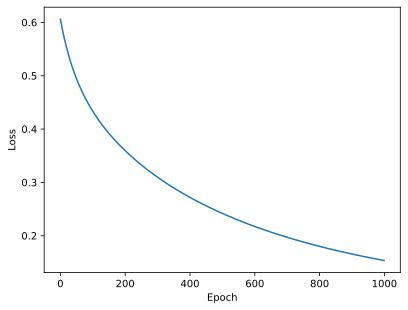

In [24]:
# Visualize predictions
plt.plot(losses, mfc="w")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#### Train The Model By Varying The Learning Rate

In [25]:
# Initialize
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_learning_rate = []
epochs = 1_000
all_losses = torch.zeros(size=(learning_rates.shape[0], epochs))

for idx, lr in enumerate(learning_rates):
    model, loss_function, optimizer = create_ANN_model(learning_rate=lr)
    y_pred, accuracy, losses = train_model(
        model=model,
        X=data,
        y=labels,
        epochs=epochs,
        loss_function=loss_function,
        optimizer=optimizer,
    )
    acc_by_learning_rate.append(accuracy)
    all_losses[idx, :] = losses

Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instant

In [26]:
all_losses.shape

torch.Size([50, 1000])

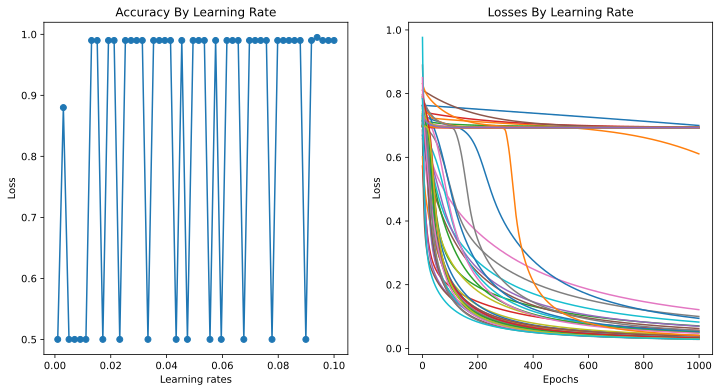

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(learning_rates, acc_by_learning_rate, marker="o")
axs[0].set_xlabel("Learning rates")
axs[0].set_ylabel("Loss")
axs[0].set_title("Accuracy By Learning Rate")

axs[1].plot(all_losses.T)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title("Losses By Learning Rate")

plt.show()

#### Observation(s)

```
- The accuracy is inconsistent. The model's accuracy varies, sometimes being quite good and other times being very low.
- This is caused by the introduction of the non-linearity. i.e the sigmoid activation function at the output layer.
```

#### Possible Options

```
1) The code creates a model with 16 hidden units. Notice where the two "16"s appear when constructing the model. Recreate the model using 32 hidden units. Does that help with the issue of models getting stuck in local minima?

2) Adjust the code to create two hidden layers. The first hidden layer should have 16 hidden units and the second hidden layer shuold have 32 units. What needs to change in the code to make the numbers match to prevent coding errors?
```

In [29]:
# 1.
def create_ANN_model(*, learning_rate: float) -> tuple[Any, Any, Any]:
    """This is used to build an ANN model with ONE hidden layer architecture.
    It returns the model, loss function and the optimizer."""

    # Model architecture
    model = nn.Sequential(
        nn.Linear(2, 32),  # input
        nn.ReLU(),  # activation function
        nn.Linear(32, 1),  # hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output
        nn.Sigmoid(),  # final activation function
    )

    # Binary Cross Entropy
    loss_function = nn.BCELoss()
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    print("Model instantiated ...")
    return model, loss_function, optimizer


def train_model(
    *,
    model: Any,
    X: torch.Tensor,
    y: torch.Tensor,
    epochs: int,
    loss_function: Any,
    optimizer: Any
) -> tuple[Any, Any, Any]:
    """This is used to train the model. It returns the model predictions, accuracy and the losses"""
    losses = torch.zeros(size=(epochs,))

    for epoch_idx in range(epochs):
        # Fwd prop
        _y_pred = model(X)

        # Compute loss
        loss = loss_function(_y_pred, y)
        losses[epoch_idx] = loss

        # Back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Make predictions
    y_proba = model(X)
    y_pred = torch.Tensor([_classify(x) for x in y_proba.detach()]).reshape(-1, 1)
    accuracy = torch.mean((y_pred == labels).float())
    print("Model training done ...")

    return y_proba, accuracy, losses.detach()


def visualize_results(LRs, lr_accuracy, all_Losses) -> None:
    _, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].plot(LRs, lr_accuracy, marker="o")
    axs[0].set_xlabel("Learning rates")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Accuracy By Learning Rate")

    axs[1].plot(all_Losses.T)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Losses By Learning Rate")

    plt.show()

In [32]:
# Initialize
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_learning_rate = []
epochs = 1_000
all_losses = torch.zeros(size=(learning_rates.shape[0], epochs))

for idx, lr in enumerate(learning_rates):
    model, loss_function, optimizer = create_ANN_model(learning_rate=lr)
    y_pred, accuracy, losses = train_model(
        model=model,
        X=data,
        y=labels,
        epochs=epochs,
        loss_function=loss_function,
        optimizer=optimizer,
    )
    acc_by_learning_rate.append(accuracy)
    all_losses[idx, :] = losses

Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instant

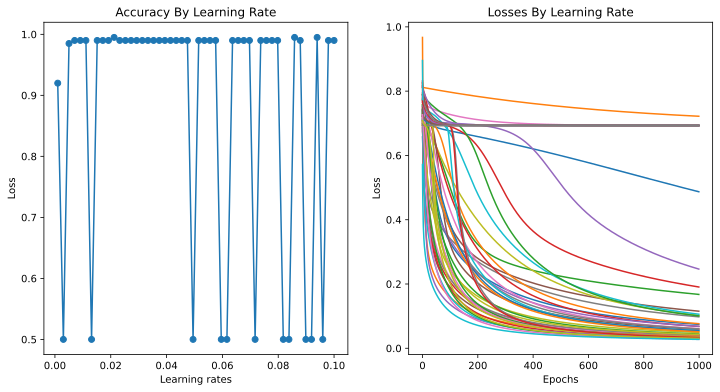

In [33]:
visualize_results(
    LRs=learning_rates,
    lr_accuracy=acc_by_learning_rate,
    all_Losses=all_losses,
)

#### Comment

- The accuracy improved when the number of hidden units doubled.

In [ ]:
# 2.
# Create 2 hidden layers and adjust the hidden units. 
# Build
model = nn.Sequential(
    # Input
    nn.Linear(2, 16),
    # Activation func
    nn.ReLU(),
    # Hidden layer
    nn.Linear(16, 32),
    # Activation func
    nn.ReLU(),
    # Hidden layer
    nn.Linear(32, 1),
    # Output
    nn.Sigmoid()
)

lr = 0.01
epochs = 1_000
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

In [34]:
def create_ANN_model(*, learning_rate: float) -> tuple[Any, Any, Any]:
    """This is used to build an ANN model with ONE hidden layer architecture.
    It returns the model, loss function and the optimizer."""

    # Model architecture
    model = nn.Sequential(
        nn.Linear(2, 16),  # input
        nn.ReLU(),  # activation function
        nn.Linear(16, 32),  # 1st hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(32, 1),  # 2nd hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output
        nn.Sigmoid(),  # final activation function
    )

    # Binary Cross Entropy
    loss_function = nn.BCELoss()
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    print("Model instantiated ...")
    return model, loss_function, optimizer

In [35]:
# Initialize
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_learning_rate = []
epochs = 1_000
all_losses = torch.zeros(size=(learning_rates.shape[0], epochs))

for idx, lr in enumerate(learning_rates):
    model, loss_function, optimizer = create_ANN_model(learning_rate=lr)
    y_pred, accuracy, losses = train_model(
        model=model,
        X=data,
        y=labels,
        epochs=epochs,
        loss_function=loss_function,
        optimizer=optimizer,
    )
    acc_by_learning_rate.append(accuracy)
    all_losses[idx, :] = losses

Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instantiated ...
Model training done ...
Model instant

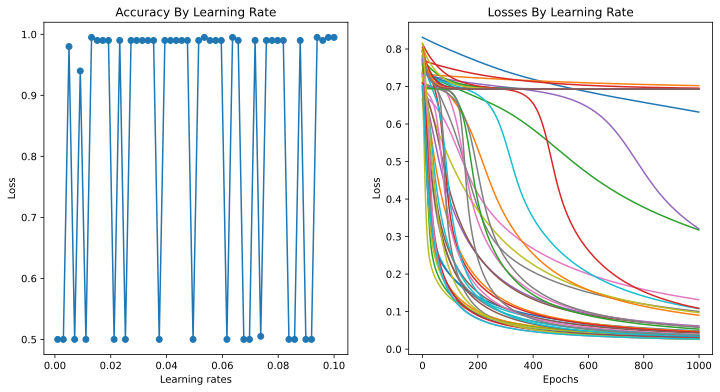

In [36]:
visualize_results(
    LRs=learning_rates,
    lr_accuracy=acc_by_learning_rate,
    all_Losses=all_losses,
)